In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 1. Preprocessing

## 1.1 Uploading and Overviewing 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_stata('/content/drive/Shareddrives/빅데이터핀테크_6조/Lending Club project/Data/lendingclub.dta')

In [ ]:
data.shape

(1092919, 333)

In [ ]:
# Overviewing columns of data
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high',
       ...
       'mths_since_recent_revol_delinq2', 'mths_since_recent_revol_delinq3',
       'mths_since_recent_revol_delinq4', 'mths_since_recent_revol_delinq5',
       'mths_since_recent_revol_delinq6', 'mths_since_recent_revol_delinq7',
       'mths_since_recent_revol_delinq8', 'mths_since_recent_revol_delinq9',
       'mths_since_recent_revol_delinq10', 'mths_since_recent_revol_delinq11'],
      dtype='object', length=333)

In [ ]:
# Checking types of data
for i in data.columns:
  print(data[i].dtypes)

int32
int32
float64
float64
float64
float64
float64
int8
int16
int16
int8
int16
int8
int32
float64
int16
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int16
int16
int8
int8
int32
int32
int8
int32
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
float32
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
int8
in

In [ ]:
# Checking missing data
for i in data.columns:
  print(i)
  print(data[i].isnull().sum())

loan_amnt
0
funded_amnt
0
funded_amnt_inv
0
int_rate
0
installment
0
annual_inc
0
dti
0
delinq_2yrs
0
fico_range_low
0
fico_range_high
0
inq_last_6mths
0
open_acc
0
pub_rec
0
revol_bal
0
revol_util
0
total_acc
0
out_prncp
0
out_prncp_inv
0
total_pymnt
0
total_pymnt_inv
0
total_rec_prncp
0
total_rec_int
0
total_rec_late_fee
0
recoveries
0
collection_recovery_fee
0
last_pymnt_amnt
0
last_fico_range_high
0
last_fico_range_low
0
collections_12_mths_ex_med
0
acc_now_delinq
0
tot_coll_amt
0
tot_cur_bal
0
chargeoff_within_12_mths
0
delinq_amnt
0
pub_rec_bankruptcies
0
tax_liens
0
emp_length1
0
emp_length2
0
emp_length3
0
emp_length4
0
emp_length5
0
emp_length6
0
emp_length7
0
emp_length8
0
emp_length9
0
emp_length10
0
emp_length11
0
emp_length12
0
home_ownership1
0
home_ownership2
0
home_ownership3
0
home_ownership4
0
home_ownership5
0
home_ownership6
0
verification_status1
0
verification_status2
0
verification_status3
0
purpose1
0
purpose2
0
purpose3
0
purpose4
0
purpose5
0
purpose6
0
purpos

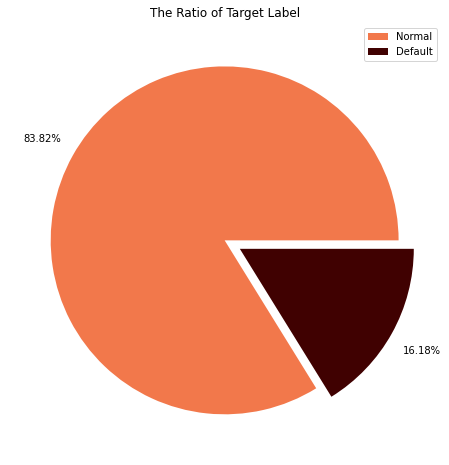

In [ ]:
# Checking the ratio of target label

explode = [0, 0.1]
colors = ['#F2784B', '#400101']

plt.figure(figsize=(12, 8))
plt.title('The Ratio of Target Label')
plt.pie(
    data['depvar'].value_counts(),
    labels=['Normal', 'Default'],
    autopct='%.2f%%',
    explode=explode,
    colors=colors,
    labeldistance=None,
    pctdistance=1.2
    )
plt.legend()

plt.show()

## 1.2 Downsampling

 * size: 10,000
 * w/o replacement

In [ ]:
data_sample = data.sample(n=10000, random_state=2021)

In [ ]:
X = data_sample.drop(columns=['depvar'])
y = data_sample['depvar']

In [ ]:
print(X.shape)
print(X.head())

(10000, 332)
         loan_amnt  ...  mths_since_recent_revol_delinq11
93478        10000  ...                                 0
1055492       6100  ...                                 0
209131        4675  ...                                 0
575112       14400  ...                                 0
617013       19150  ...                                 0

[5 rows x 332 columns]


In [ ]:
print(y.shape)
print(y.head())

(10000,)
93478      0.0
1055492    0.0
209131     1.0
575112     0.0
617013     1.0
Name: depvar, dtype: float32


## 1.3 Feature Selection
 * ExtraTreesClassifier from sci-kit learn

In [ ]:
# Selecting the most influential 10 features with  ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

etc_model=ExtraTreesClassifier(random_state=2021)
etc_model.fit(X,y)

# print(etc_model.feature_importances_)
feature_list=pd.concat([pd.Series(X.columns),pd.Series(etc_model.feature_importances_)],axis=1)
feature_list.columns=['features_name','importance']
top_feature = feature_list.sort_values("importance",ascending=False)[:10]

In [ ]:
top_feature

,features_name,importance
23,recoveries,0.129676
24,collection_recovery_fee,0.100158
27,last_fico_range_low,0.078219
26,last_fico_range_high,0.076396
20,total_rec_prncp,0.060888
243,debt_settlement_flag1,0.056758
25,last_pymnt_amnt,0.030386
19,total_pymnt_inv,0.029384
18,total_pymnt,0.028625
0,loan_amnt,0.024275


In [ ]:
# Extracting 10 features from the downsampled dataset
top_list = []
for i in top_feature.index:
  top_list.append(X.columns[i])

top_X=X[top_list]
top_X.head()

,recoveries,collection_recovery_fee,last_fico_range_low,last_fico_range_high,total_rec_prncp,debt_settlement_flag1,last_pymnt_amnt,total_pymnt_inv,total_pymnt,loan_amnt
93478,0.0,0.0,735,739,10000.00,1,5931.90,11424.59,11424.586480,10000
1055492,0.0,0.0,755,759,6100.00,1,188.02,6777.91,6777.914909,6100
209131,0.0,0.0,510,514,927.00,1,195.61,1884.84,1884.840000,4675
575112,0.0,0.0,675,679,14400.00,1,489.50,17643.25,17643.246680,14400
617013,0.0,0.0,650,654,1584.89,1,1044.48,4090.77,4101.480000,19150


In [ ]:
top_X.shape

(10000, 10)

## 1.4 Feature Engineering
 * Create new feature 'last_fico_range_mean' replacing 'last_fico_high' & 'last_fico_range_low'
 * Delete the feature 'total_pymt' (simliar with 'total_pymt_inv')

In [ ]:
top_X.corr()

,recoveries,collection_recovery_fee,last_fico_range_low,last_fico_range_high,total_rec_prncp,debt_settlement_flag1,last_pymnt_amnt,total_pymnt_inv,total_pymnt,loan_amnt
recoveries,1.000000,0.977110,-0.213799,-0.274431,-0.171847,-0.488081,-0.136683,-0.029218,-0.029208,0.179081
collection_recovery_fee,0.977110,1.000000,-0.197783,-0.259714,-0.158973,-0.506206,-0.130787,-0.020022,-0.020014,0.172375
last_fico_range_low,-0.213799,-0.197783,1.000000,0.838261,0.269519,0.094653,0.179024,0.208268,0.208265,0.094002
last_fico_range_high,-0.274431,-0.259714,0.838261,1.000000,0.308102,0.151904,0.210748,0.228762,0.228771,0.098539
total_rec_prncp,-0.171847,-0.158973,0.269519,0.308102,1.000000,0.099116,0.534673,0.970371,0.970399,0.872034
debt_settlement_flag1,-0.488081,-0.506206,0.094653,0.151904,0.099116,1.000000,0.095948,0.029457,0.029442,-0.015829
last_pymnt_amnt,-0.136683,-0.130787,0.179024,0.210748,0.534673,0.095948,1.000000,0.461181,0.461238,0.439284
total_pymnt_inv,-0.029218,-0.020022,0.208268,0.228762,0.970371,0.029457,0.461181,1.000000,0.999995,0.910913
total_pymnt,-0.029208,-0.020014,0.208265,0.228771,0.970399,0.029442,0.461238,0.999995,1.000000,0.910940
loan_amnt,0.179081,0.172375,0.094002,0.098539,0.872034,-0.015829,0.439284,0.910913,0.910940,1.000000


In [ ]:
# create 'last_fico_range_mean'

def filter_fico(val):
    if val >= 800:
        score = 5
    elif val >= 740:
        score = 4
    elif val >= 670:
        score = 3
    elif val >= 580:
        score = 2
    else:
        score = 1
    
    return score

top_X['last_fico_range_mean'] = np.mean([top_X['last_fico_range_high'].map(filter_fico), top_X['last_fico_range_low'].map(filter_fico)], axis=0)

In [ ]:
# remove 'total_pymnt', 'last_fico_range_high', 'last_fico_range_low'
top_X.drop(['total_pymnt', 'last_fico_range_high', 'last_fico_range_low'], axis =1, inplace = True)

top_X.head()

,recoveries,collection_recovery_fee,total_rec_prncp,debt_settlement_flag1,last_pymnt_amnt,total_pymnt_inv,loan_amnt,last_fico_range_mean
93478,0.0,0.0,10000.00,1,5931.90,11424.59,10000,3.0
1055492,0.0,0.0,6100.00,1,188.02,6777.91,6100,4.0
209131,0.0,0.0,927.00,1,195.61,1884.84,4675,1.0
575112,0.0,0.0,14400.00,1,489.50,17643.25,14400,3.0
617013,0.0,0.0,1584.89,1,1044.48,4090.77,19150,2.0


In [ ]:
top_X.shape

(10000, 8)

In [ ]:
top_X.describe()

,recoveries,collection_recovery_fee,total_rec_prncp,debt_settlement_flag1,last_pymnt_amnt,total_pymnt_inv,loan_amnt,last_fico_range_mean
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,205.296965,34.174214,12224.960436,0.97630,3936.141707,14858.996993,13652.480000,2.733900
std,869.769800,151.480759,8478.519265,0.15212,5726.951798,10202.047216,8442.192853,1.061887
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1000.000000,1.000000
25%,0.000000,0.000000,5812.430000,1.00000,327.330000,7050.265000,7068.750000,2.000000
50%,0.000000,0.000000,10000.000000,1.00000,989.030000,11956.695000,11962.500000,3.000000
75%,0.000000,0.000000,17000.000000,1.00000,5531.665000,20547.490000,19200.000000,3.000000
max,18000.000000,3240.000000,40000.000000,1.00000,39471.170000,59962.370000,40000.000000,5.000000


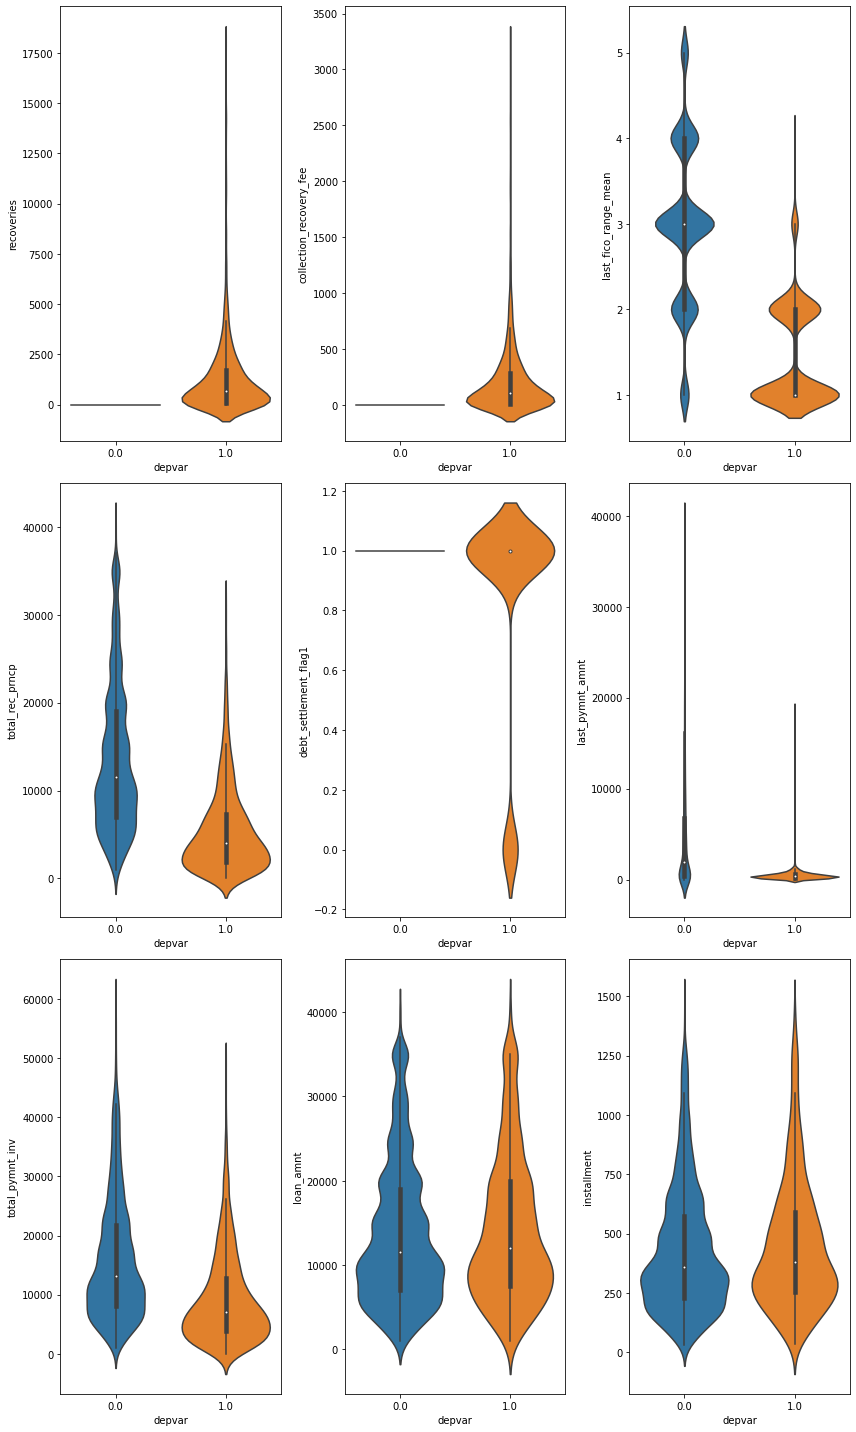

In [ ]:
# Visualizing the features with Violineplot

data_sample["last_fico_range_mean"] = top_X["last_fico_range_mean"]

fig = plt.figure(figsize=(12, 20))
gs = fig.add_gridspec(3,3)

import seaborn as sns

ax = fig.add_subplot(gs[0,0])
sns.violinplot(x= 'depvar', y = 'recoveries', data = data_sample)

ax = fig.add_subplot(gs[0,1])
sns.violinplot(x= 'depvar', y = 'collection_recovery_fee', data = data_sample)

ax = fig.add_subplot(gs[0,2])
sns.violinplot(x= 'depvar', y = 'last_fico_range_mean', data = data_sample)

ax = fig.add_subplot(gs[1,0])
sns.violinplot(x= 'depvar', y = 'total_rec_prncp', data = data_sample)

ax = fig.add_subplot(gs[1,1])
sns.violinplot(x= 'depvar', y = 'debt_settlement_flag1', data = data_sample)

ax = fig.add_subplot(gs[1,2])
sns.violinplot(x= 'depvar', y = 'last_pymnt_amnt', data = data_sample)

ax = fig.add_subplot(gs[2,0])
sns.violinplot(x= 'depvar', y = 'total_pymnt_inv', data = data_sample)

ax = fig.add_subplot(gs[2,1])
sns.violinplot(x= 'depvar', y = 'loan_amnt', data = data_sample)

ax = fig.add_subplot(gs[2,2])
sns.violinplot(x= 'depvar', y = 'installment', data = data_sample) # the 11th top feature

fig.tight_layout()
plt.show()

## 1.5 Splitting Train / Validation / Test Set
 * Training : Vaildation : Test = 6 : 2 : 2

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(top_X, y, test_size = 0.2, random_state =2021)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.25, random_state=2021)

In [ ]:
X_train.shape

(6000, 8)

In [ ]:
X_val.shape

(2000, 8)

In [ ]:
X_test.shape

(2000, 8)

In [ ]:
y_train.shape

(6000,)

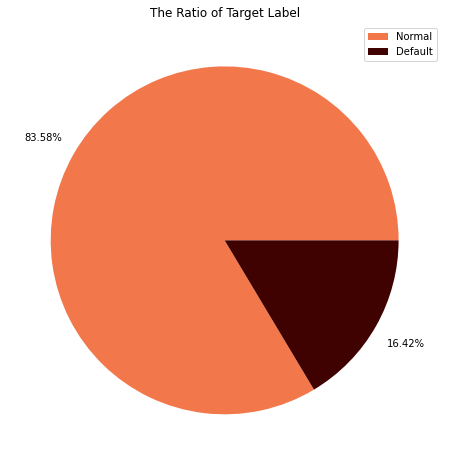

In [ ]:
# Checking the ratio of target label in training set

explode = [0, 0.1]
colors = ['#F2784B', '#400101']

plt.figure(figsize=(12, 8))
plt.title('The Ratio of Target Label')
plt.pie(
   y_train.value_counts(),
    labels=['Normal', 'Default'],
    autopct='%.2f%%',
    colors=colors,
    labeldistance=None,
    pctdistance=1.2
    )
plt.legend()

plt.show()

In [ ]:
y_val.shape

(2000,)

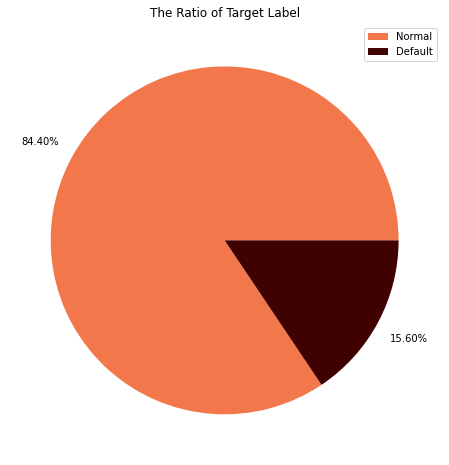

In [ ]:
# Checking the ratio of target label in validation set

plt.figure(figsize=(12, 8))
plt.title('The Ratio of Target Label')
plt.pie(
   y_val.value_counts(),
    labels=['Normal', 'Default'],
    autopct='%.2f%%',
    colors=colors,
    labeldistance=None,
    pctdistance=1.2
    )
plt.legend()

plt.show()

In [ ]:
y_test.shape

(2000,)

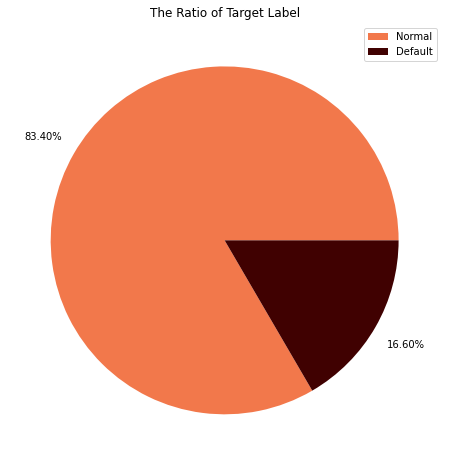

In [ ]:
# Checking the ratio of target label in test set

plt.figure(figsize=(12, 8))
plt.title('The Ratio of Target Label')
plt.pie(
   y_test.value_counts(),
    labels=['Normal', 'Default'],
    autopct='%.2f%%',
    colors=colors,
    labeldistance=None,
    pctdistance=1.2
    )
plt.legend()

plt.show()

# 2. Training Classifier

## 2.1. eXtreme Gradient Boosting (XG Boost)

In [ ]:
import xgboost

xgb_clf = xgboost.XGBClassifier(learning_rate=0.5,
                                    max_depth=5,
                                    n_estimators=100,
                                    objective='binary:logistic',
                                    random_state=2021,
                                    scale_pos_weight=5.25) # control imbalance of classes (84:16)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2021,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.25, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgb = xgb_clf.predict_proba(X_val)[:, 1]

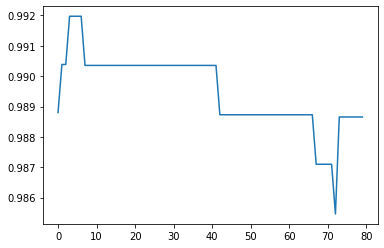

In [ ]:
# Checking performance with F1 score
from sklearn.metrics import f1_score

scores = []

for i in np.arange(0.1, 0.9, 0.01):
    scores.append({'threshold': i, 'f1 score': f1_score(y_val, np.where(y_pred_xgb >= i, 1, 0))})

plt.plot([d['f1 score'] for d in scores])
plt.show()

In [ ]:
# Average F1 score
scores = pd.DataFrame(scores)
scores['f1 score'].mean()

0.98949462674977

## 2.2 Hyper Parameter Tuning (XG Boost)
* GridSearchCV
 * The number of CV folds : 5
 * Scoring criterion: F1 score
* The Optimized Parameter
 * max_depth = 6
 * n_estimators = 40
 * learning_rate = 0.8

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = xgboost.XGBClassifier(
    objective = 'binary:logistic',
    seed=2021
)

param_grid = [
              {'max_depth': range(2, 10, 1),
               'n_estimators': range(10, 50, 10),
               'learning_rate': [0.5, 0.6, 0.7, 0.8]}
]

optimal_params = GridSearchCV(
    estimator,
    param_grid,
    cv=5,
    scoring =  'f1')

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'learning_rate': 0.8, 'max_depth': 6, 'n_estimators': 40}


In [ ]:
# Applying tuned parameters
xgb_clf = xgboost.XGBClassifier(learning_rate = 0.8, 
                                max_depth = 6,
                                n_estimators = 40,
                                objective = 'binary:logistic',
                                random_state = 2021,
                                scale_pos_weight=5.25)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.8, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2021,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.25, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgb = xgb_clf.predict_proba(X_val)[:, 1]

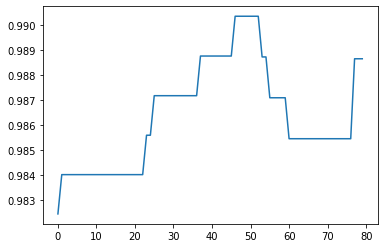

In [ ]:
# evaluating model with F1 score
scores = []

for i in np.arange(0.1, 0.9, 0.01):
    scores.append({'threshold': i, 'f1 score': f1_score(y_val, np.where(y_pred_xgb >= i, 1, 0))})

plt.plot([d['f1 score'] for d in scores])
plt.show()

In [ ]:
# Average F1 score
scores = pd.DataFrame(scores)
scores['f1 score'].mean()

0.9863931955908033

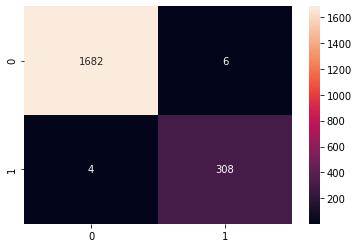

In [ ]:
# Plotting the confusion matrix (threshold 0.3)
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, np.where(y_pred_xgb >= 0.3, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.3)
f1_score(y_val, np.where(y_pred_xgb >= 0.3, 1, 0))

0.9840255591054313

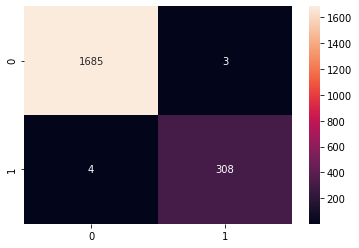

In [ ]:
# Plotting the confusion matrix (threshold 0.5)
sns.heatmap(confusion_matrix(y_val, np.where(y_pred_xgb >= 0.5, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.5)
f1_score(y_val, np.where(y_pred_xgb >= 0.5, 1, 0))

0.9887640449438203

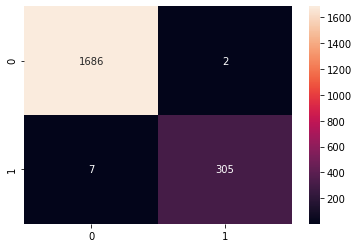

In [ ]:
# Plotting the confusion matrix (threshold 0.7)
sns.heatmap(confusion_matrix(y_val, np.where(y_pred_xgb >= 0.7, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.7)
f1_score(y_val, np.where(y_pred_xgb >= 0.7, 1, 0))

0.98546042003231

## 2.3 Support Vector Machine (RBF Kernel)
 * Kernel: Radial Basis Function (Gaussian RBF)

In [ ]:
from sklearn.svm import SVC

clf_svm = SVC(kernel='rbf',
              probability=True,
              random_state=2021,
              class_weight={0: 5.25, 1:1.0}) # default : C=1, gamma = auto to space, control imbalance of classes (84:16)
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 5.25, 1: 1.0},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=True, random_state=2021,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_svm = clf_svm.predict_proba(X_val)[:, 1]

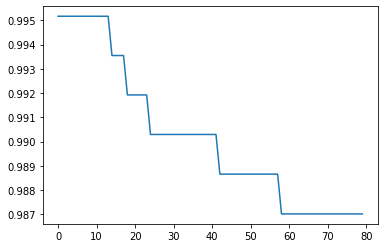

In [ ]:
# Checking performance with F1 score
scores = []

for i in np.arange(0.1, 0.9, 0.01):
    scores.append({'threshold': i, 'f1 score': f1_score(y_val, np.where(y_pred_svm >= i, 1, 0))})

plt.plot([d['f1 score'] for d in scores])
plt.show()

In [ ]:
# Average F1 score
scores = pd.DataFrame(scores)
scores['f1 score'].mean()

0.9902012545438564

## 2.4 Hyper Parameter Tuning (RBF SVM)
* GridSearchCV
 * The number of CV folds : 5
 * Scoring criterion: F1 score
* The Optimized Parameter
 * C = 30
 * gamma = 1e-7

In [ ]:
param_grid = [
    {'C': [10, 20, 30, 40, 50],
    'gamma': [0.1, 0.01, 1e-4, 1e-7],
    'kernel': ['rbf']}
]

optimal_params = GridSearchCV(
                    SVC(probability = True, random_state = 2021),  
                    param_grid, 
                    cv=5,     
                    scoring = 'f1') 

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 30, 'gamma': 1e-07, 'kernel': 'rbf'}


In [ ]:
# Applying tuned parameters 

clf_svm = SVC(kernel = 'rbf',
              probability = True,
              random_state = 2021,
              C=30, gamma = 1e-7, 
              class_weight={0: 5.25, 1:1.0})
clf_svm.fit(X_train, y_train)

SVC(C=30, break_ties=False, cache_size=200, class_weight={0: 5.25, 1: 1.0},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=1e-07,
    kernel='rbf', max_iter=-1, probability=True, random_state=2021,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_svm = clf_svm.predict_proba(X_val)[:, 1]

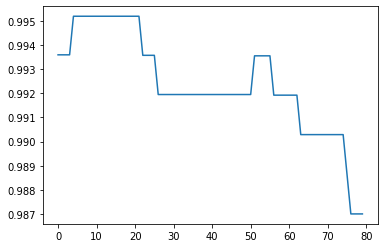

In [ ]:
# evaluating model with F1 score
scores = []

for i in np.arange(0.1, 0.9, 0.01):
    scores.append({'threshold': i, 'f1 score': f1_score(y_val, np.where(y_pred_svm >= i, 1, 0))})

plt.plot([d['f1 score'] for d in scores])
plt.show()

In [ ]:
# Average F1 score
scores = pd.DataFrame(scores)
scores['f1 score'].mean()

0.9924008861091025

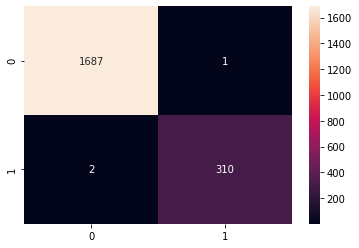

In [ ]:
# Plotting the confusion matrix (threshold 0.3)
sns.heatmap(confusion_matrix(y_val, np.where(y_pred_svm >= 0.3, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.3)
f1_score(y_val, np.where(y_pred_svm >= 0.3, 1, 0))

0.9951845906902087

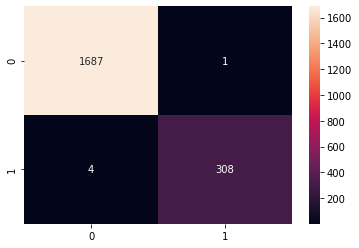

In [ ]:
# Plotting the confusion matrix (threshold 0.5)
sns.heatmap(confusion_matrix(y_val, np.where(y_pred_svm >= 0.5, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.5)
f1_score(y_val, np.where(y_pred_svm >= 0.5, 1, 0))

0.9919484702093397

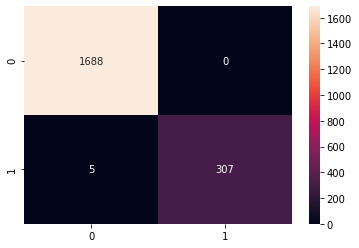

In [ ]:
# Plotting the confusion matrix (threshold 0.7)
sns.heatmap(confusion_matrix(y_val, np.where(y_pred_svm >= 0.7, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.7)
f1_score(y_val, np.where(y_pred_svm >= 0.7, 1, 0))

0.9919224555735056

# 3. Evaluating Classifier

 * Scoring Optimized models with test sets by F1 Scores 

## 3.1. Optimized XG Boost

 * Average F1 score = 0.9883
 * (threshold 0.3) F1 = 0.9894
 * (threshold 0.5) F1 = 0.9893
 * (threshold 0.7) F1 = 0.9878

In [ ]:
xgb_clf = xgboost.XGBClassifier(learning_rate = 0.8, 
                                max_depth = 6,
                                n_estimators = 40,
                                objective = 'binary:logistic',
                                random_state = 2021,
                                scale_pos_weight=5.25)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.8, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2021,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5.25, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgb = xgb_clf.predict_proba(X_test)[:, 1]

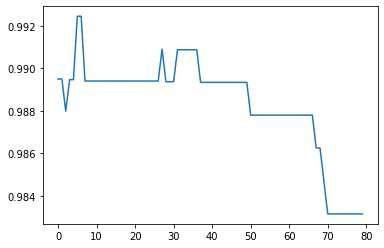

In [ ]:
# evaluating model with F1 score
scores = []

for i in np.arange(0.1, 0.9, 0.01):
    scores.append({'threshold': i, 'f1 score': f1_score(y_test, np.where(y_pred_xgb >= i, 1, 0))})

plt.plot([d['f1 score'] for d in scores])
plt.show()

In [ ]:
# Average F1 score
scores = pd.DataFrame(scores)
xg_f1_avg = scores['f1 score'].mean()
xg_f1_avg

0.9883292974967333

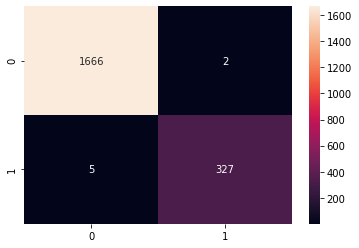

In [ ]:
# Plotting the confusion matrix (threshold 0.3)
sns.heatmap(confusion_matrix(y_test, np.where(y_pred_xgb >= 0.3, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.3)
xg_f1_3 = f1_score(y_test, np.where(y_pred_xgb >= 0.3, 1, 0))
xg_f1_3

0.989409984871407

In [ ]:
# Expected Monetary Loss
XG_3_Y=pd.DataFrame(np.transpose(np.vstack([y_test,np.where(y_pred_xgb >= 0.3, 1, 0)])),index=y_test.index,columns=['Real','Predicted'])
XG_3=XG_3_Y.join(X['loan_amnt'],how='left')
XG_3.groupby(by=['Real','Predicted']).sum()

loan_amnt
Real Predicted           
0.0  0.0         23092625
     1.0            11700
1.0  0.0            51875
     1.0          4585750

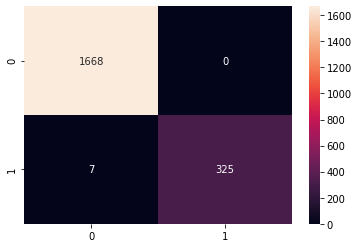

In [ ]:
# Plotting the confusion matrix (threshold 0.5)
sns.heatmap(confusion_matrix(y_test, np.where(y_pred_xgb >= 0.5, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.5)
xg_f1_5 = f1_score(y_test, np.where(y_pred_xgb >= 0.5, 1, 0))
xg_f1_5

0.989345509893455

In [ ]:
# Expected Monetary Loss
XG_5_Y=pd.DataFrame(np.transpose(np.vstack([y_test,np.where(y_pred_xgb >= 0.5, 1, 0)])),index=y_test.index,columns=['Real','Predicted'])
XG_5=XG_5_Y.join(X['loan_amnt'],how='left')
XG_5.groupby(by=['Real','Predicted']).sum()

loan_amnt
Real Predicted           
0.0  0.0         23104325
1.0  0.0            72875
     1.0          4564750

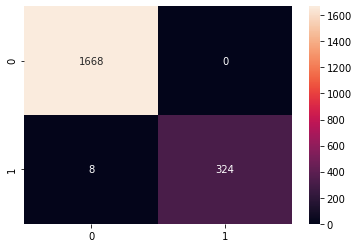

In [ ]:
# Plotting the confusion matrix (threshold 0.7)
sns.heatmap(confusion_matrix(y_test, np.where(y_pred_xgb >= 0.7, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.7)
xg_f1_7 = f1_score(y_test, np.where(y_pred_xgb >= 0.7, 1, 0))
xg_f1_7

0.9878048780487805

In [ ]:
# Expected Monetary Loss
XG_7_Y=pd.DataFrame(np.transpose(np.vstack([y_test,np.where(y_pred_xgb >= 0.7, 1, 0)])),index=y_test.index,columns=['Real','Predicted'])
XG_7=XG_7_Y.join(X['loan_amnt'],how='left')
XG_7.groupby(by=['Real','Predicted']).sum()

loan_amnt
Real Predicted           
0.0  0.0         23104325
1.0  0.0            75750
     1.0          4561875

## 3.2. Optimized RBF SVM
 * Average F1 score = 0.9948
 * (threshold 0.3) F1 = 1.0
 * (threshold 0.5) F1 = 0.9955
 * (threshold 0.7) F1 = 0.9924

In [ ]:
clf_svm = SVC(kernel = 'rbf',
              probability = True,
              random_state = 2021,
              C=30, gamma = 1e-07,
              class_weight={0: 5.25, 1:1.0})
clf_svm.fit(X_train, y_train)

SVC(C=30, break_ties=False, cache_size=200, class_weight={0: 5.25, 1: 1.0},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=1e-07,
    kernel='rbf', max_iter=-1, probability=True, random_state=2021,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_svm = clf_svm.predict_proba(X_test)[:, 1]

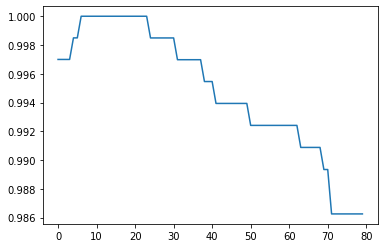

In [ ]:
# evaluating model with F1 score
scores = []

for i in np.arange(0.1, 0.9, 0.01):
    scores.append({'threshold': i, 'f1 score': f1_score(y_test, np.where(y_pred_svm >= i, 1, 0))})

plt.plot([d['f1 score'] for d in scores])
plt.show()

In [ ]:
# Average F1 score
scores = pd.DataFrame(scores)
svm_f1_avg = scores['f1 score'].mean()
svm_f1_avg

0.994834931654211

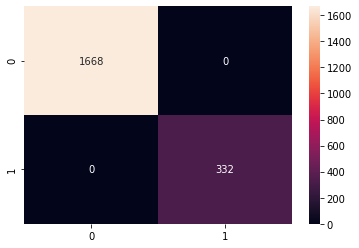

In [ ]:
# Plotting the confusion matrix (threshold 0.3)
sns.heatmap(confusion_matrix(y_test, np.where(y_pred_svm >= 0.3, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.3)
svm_f1_3 = f1_score(y_test, np.where(y_pred_svm >= 0.3, 1, 0))
svm_f1_3

1.0

In [ ]:
# Expected Monetary Loss
svm_3_Y=pd.DataFrame(np.transpose(np.vstack([y_test,np.where(y_pred_svm >= 0.3, 1, 0)])),index=y_test.index,columns=['Real','Predicted'])
svm_3=svm_3_Y.join(X['loan_amnt'],how='left')
svm_3.groupby(by=['Real','Predicted']).sum()

,,loan_amnt
Real,Predicted,
0.0,0.0,23104325
1.0,1.0,4637625


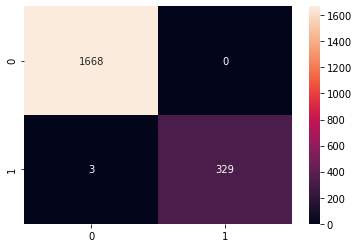

In [ ]:
# Plotting the confusion matrix (threshold 0.5)
sns.heatmap(confusion_matrix(y_test, np.where(y_pred_svm >= 0.5, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.5)
svm_f1_5 = f1_score(y_test, np.where(y_pred_svm >= 0.5, 1, 0))
svm_f1_5

0.9954614220877459

In [ ]:
# Expected Monetary Loss
svm_5_Y=pd.DataFrame(np.transpose(np.vstack([y_test,np.where(y_pred_svm >= 0.5, 1, 0)])),index=y_test.index,columns=['Real','Predicted'])
svm_5=svm_5_Y.join(X['loan_amnt'],how='left')
svm_5.groupby(by=['Real','Predicted']).sum()

loan_amnt
Real Predicted           
0.0  0.0         23104325
1.0  0.0            32200
     1.0          4605425

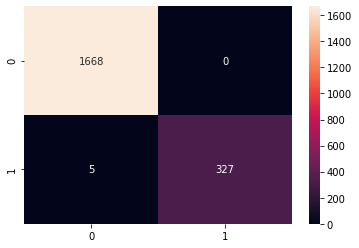

In [ ]:
# Plotting the confusion matrix (threshold 0.7)
sns.heatmap(confusion_matrix(y_test, np.where(y_pred_svm >= 0.7, 1, 0)), fmt = 'd', annot=True)

In [ ]:
# F1 score (threshold 0.7)
svm_f1_7 = f1_score(y_test, np.where(y_pred_svm >= 0.7, 1, 0))
svm_f1_7

0.992412746585736

In [ ]:
# Expected Monetary Loss
svm_7_Y=pd.DataFrame(np.transpose(np.vstack([y_test,np.where(y_pred_svm >= 0.7, 1, 0)])),index=y_test.index,columns=['Real','Predicted'])
svm_7=svm_7_Y.join(X['loan_amnt'],how='left')
svm_7.groupby(by=['Real','Predicted']).sum()

loan_amnt
Real Predicted           
0.0  0.0         23104325
1.0  0.0            52700
     1.0          4584925